# Calculando la Beta

En esta nueva serie de Jupyter Notebooks, calcularemos en Python los ratios basicos de las finanzas, tales como el Sharpe, CAPM, profit factor, Sortino, Avg Winning, Win Rate, BMO, VAR etc...,  
Todo de forma simplificada, y explicando todos los pasos necesarios para llegar a calcularlos desde casa, con las minimas liberias posibles, y entendiendo todo lo que se esta haciendo.  
Una vez mas, con la ayuda de Pandas, Numpy, y en este caso, descargando datos historicos desde la API de Alpha Vantage, muy util para un nivel no profesional de datos.

En este primer caso, vamos a calcular la Beta de un activo contra el $spy  
Lo optimo seria calcularlo de nuestra estrategia contra el mercado, o de nuestro mutual fund, pero para simplificar todo el proceso, vamos a hacerlo con una accion cualquiera  
Simplemente haciendo unas modificaciones al codigo, podriamos calcularlo con cualquier serie temporal, pero como introduccion, contra dos activos, me parece correcto.

Definicion de beta :
La Beta de un activo financiero es una medida de sensibilidad que se utiliza para conocer la variación relativa de rentabilidad que sufre dicho activo en relación a un índice de referencia.


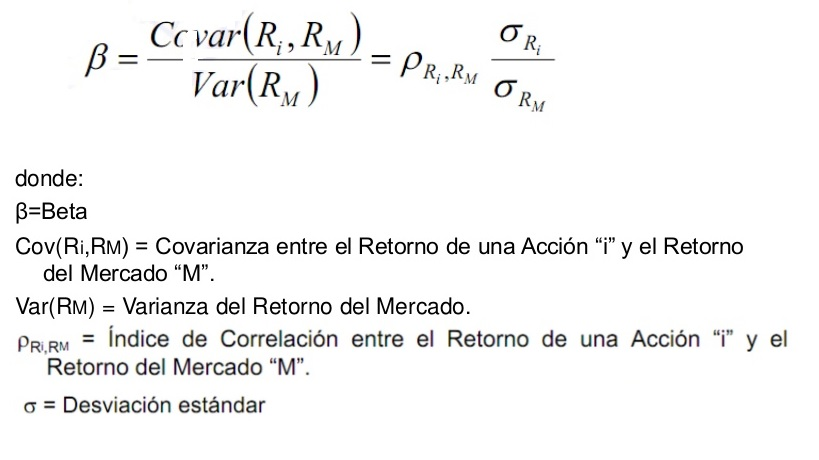

In [25]:
from IPython.display import Image
Image("https://d31dn7nfpuwjnm.cloudfront.net/images/valoraciones/0025/0006/BETA.jpg")

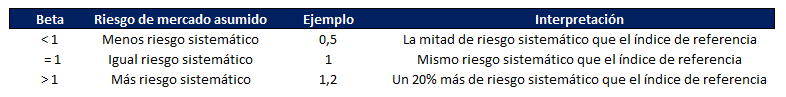

In [1]:
from IPython.display import Image
Image("https://economipedia.com/wp-content/uploads/distintos-valores-de-beta.png")

Si una acción tiene una Beta de 1,1 respecto al índice de referencia, quiere decir que esta acción se moverá un 10% más de lo que lo haga dicho índice.En este caso, si el índice sube un 10%, la acción subirá un 11% (10%*Beta), y si cae un 10% la acción caerá un 11%.

Una vez dejada la teoria clara, vamos a empezar a programar esto, de manera sencilla, para simplificar sus calculos    
  
      
Lo primero que debemos realizar, es cargar las librerias que utilizaremos, en este caso, las ya habituales, numpy y pandas, y ahora nos adentraremos en alpha_vantage. Una API gratuita de datos de stocks americanos, que tiene una fiabilidad bastante aceptable, y muy pocas limitaciones para usuarios gratuitos. Me parece la herramienta idonea para nuestro ejemplo

In [2]:
import numpy as np #cargamos numpy
import pandas as pd #cargamos pandas  
from alpha_vantage.timeseries import TimeSeries # cargamos la funcion timeseries de alpha_vantage, que sera la unica que utilizaremos, asi nos evitamos cargar toda la liberia.
ts = TimeSeries(key='4BI2AS02BGJO4I31',output_format='pandas') # le damos nuestra clave API, y como queremos que nos devuelva los datos, en el objeto TS ( TS viene de TimeSeries, que es lo que descargamos)

In [5]:
beta = pd.DataFrame() # Creamos un dataframe vacio, para trabajarlo posteriormente.

In [6]:
tickers = ['tsla','spy'] # Añadimos una lista con los tickers que vamos a utilizar, para este ejemplo, he utilizado $TSLA como activo y $SPY como benchmark.
nombres = ['tesla','sp500'] # les asignamos nombres para tener luego un dataframe mucho mas visual

Ahora vamos a crear un bucle for, que recorra la lista tickers, y se descargue los datos, y los renombre. Simplemente eso, es muy sencillo

In [7]:
for i in range(len(tickers)): # iniciamos el for desde i hasta un rango de la longuitud de nuestra lista tickers. Es decir desde 1 hasta 2, siendo 1 , el primer valor de la lista tickers(tsla) y 2 el segundo valor de la lista(spy)
    print(tickers[i]+"  "+nombres[i]) # mostramos por pantalla el ticker y el nombre
    temp,meta= ts.get_daily_adjusted(tickers[i],outputsize='full') # y descargamos los datos, el dato en cuestion estara en el dataframe temp, el dataframe meta, es metadatos sobre los datos, es decir, el timeframe, las fechas etc..etc..
    beta[nombres[i]] = temp['5. adjusted close'] # y una vez descargados, los movemos al dataframe beta, y como nombre de columna , le asingamos el nombre del activo que hemos añadidio en la lista

tsla  tesla
spy  sp500


Una vez realizado este proceso, vamos a mostrar el dataframe beta, donde contendra los closes ajustados de los tickers $TSLA$ y $SPY$

In [10]:
beta # para mostrar el DataFrame Beta

,tesla,sp500
date,,
2019-11-29,329.94,314.3100
2019-11-27,331.29,315.4800
2019-11-26,328.92,314.0800
2019-11-25,336.34,313.3700
2019-11-22,333.04,310.9600
...,...,...
2010-07-06,16.11,85.3737
2010-07-02,19.20,84.8176
2010-07-01,21.96,85.2824


Ahora vamos a calcular el logaritmo de los retornos de todo el dataframe.
Lo haremos dividiendo el valor de beta entre beta(t-1) y posteriormente sacando el logaritmo.

In [13]:
sec_returns = np.log( beta / beta.shift(1))

mostraremos el df sec_returns, para comprobar que este todo correcto, y ploteamos para hacerlo mas visual

In [14]:
sec_returns

,tesla,sp500
date,,
2019-11-29,NaN,NaN
2019-11-27,0.004083,0.003716
2019-11-26,-0.007180,-0.004448
2019-11-25,0.022308,-0.002263
2019-11-22,-0.009860,-0.007720
...,...,...
2010-07-06,0.019430,-0.031010
2010-07-02,0.175470,-0.006535
2010-07-01,0.134312,0.005465


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3586382cd0>,
      dtype=object)

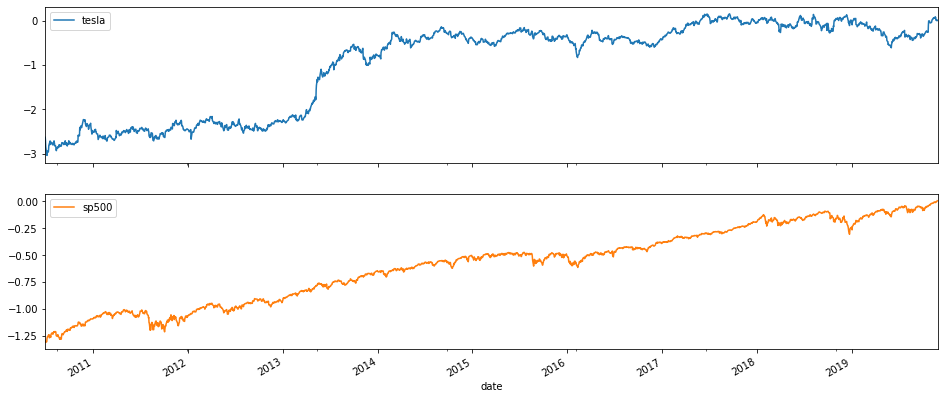

In [22]:
sec_returns.cumsum().plot(subplots=True,figsize=(16,7)) 
# le decimos que .cumsum() , es decir, que sume los valores, y que luego .plot() es decir que plotee los mismos, 
#haciendo subplots=True, hace que los muestre en dos graficos, y con el parametro figsize, le damos un tamaño al plot

Posteriormente, sacaremos la covarianza de esos retornos.
¿Como lo haremos? pues con el dataframe de los retornos en logaritmo con el metodo .cov(), que justamente hace eso, y lo multiplicaremos * 250

In [24]:
cov = sec_returns.cov() * 250
cov #mostramos el dataframe

,tesla,sp500
tesla,0.261226,0.026622
sp500,0.026622,0.020618


Ya tenemos calculada la covarianza entre todas las columnas(tickers) del dataframe, y ahora vamos a elegir  la que nos interesa(0,1) es decir, de la columna 0, el valor 1.  
Siendo en este caso la columna tesla(0), el valor 1(sp500)

In [25]:
cov_with_market = cov.iloc[0,1]
cov_with_market # la mostramos en pantalla

0.026622159639309608

Ahora para ser fieles a la formula de la beta, tenemos que obtener la varianza del mercado, en este caso del ticker $SPY$  
¿pues como lo hacemos? Muy simple en python, mediante el metodo .var(), que justamente nos calcula eso, y la multimplicamos * 250

In [26]:
market_var = sec_returns['sp500'].var() * 250
market_var

0.020618001406587885

Una vez tenemos todos los ingredientes, es decir la covarianza con el mercado, y la varianza del mercado, calcular la beta, es unicamente hacer el cociente entre estos dos parametros, y asi lo haremos!

In [27]:
TSLA_beta= cov_with_market / market_var # division entre la covarianza contra mercado dividido entre la varianza del mercado
TSLA_beta

1.2912095170777933

Y de forma rapida, y en poquitas lineas de codigo, hemos podido calcular la beta de un activo vs su benchmark,  
ahora voy a orderlo todo en una funcion, para tener un acceso inmediato a la misma

In [33]:
def beta(activos,nombres):
    beta = pd.DataFrame() # Creamos un dataframe vacio, para trabajarlo posteriormente.
    for i in range(len(activos)): # iniciamos el for desde i hasta un rango de la longuitud de nuestra lista tickers. Es decir desde 1 hasta 2, siendo 1 , el primer valor de la lista tickers(tsla) y 2 el segundo valor de la lista(spy)
        temp,meta= ts.get_daily_adjusted(activos[i],outputsize='full') # y descargamos los datos, el dato en cuestion estara en el dataframe temp, el dataframe meta, es metadatos sobre los datos, es decir, el timeframe, las fechas etc..etc..
        beta[nombres[i]] = temp['5. adjusted close'] # y una vez descargados, los movemos al dataframe beta, y como nombre de columna , le asingamos el nombre del activo que hemos añadidio en la lista
    sec_returns = np.log( beta / beta.shift(1))
    cov = sec_returns.cov() * 250
    cov_with_market = cov.iloc[0,1]
    market_var = sec_returns['sp500'].var() * 250
    beta_= cov_with_market / market_var # division entre la covarianza contra mercado dividido entre la varianza del mercado
    return beta_

In [35]:
tickers = ['amzn','spy'] # Añadimos una lista con los tickers que vamos a utilizar, para este ejemplo, he utilizado $TSLA como activo y $SPY como benchmark.
nombres = ['amazon','sp500'] # les asignamos nombres para tener luego un dataframe mucho mas visual
beta(tickers,nombres)

1.2830922756145005

De esta forma podemos calcular de manera agil, la beta, en cualquier momento. 